<a href="https://colab.research.google.com/github/Sentiago22/ISIT2024/blob/main/%D0%9F%D0%A0_3%D0%98%D0%A1%D0%B8%D0%A2%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

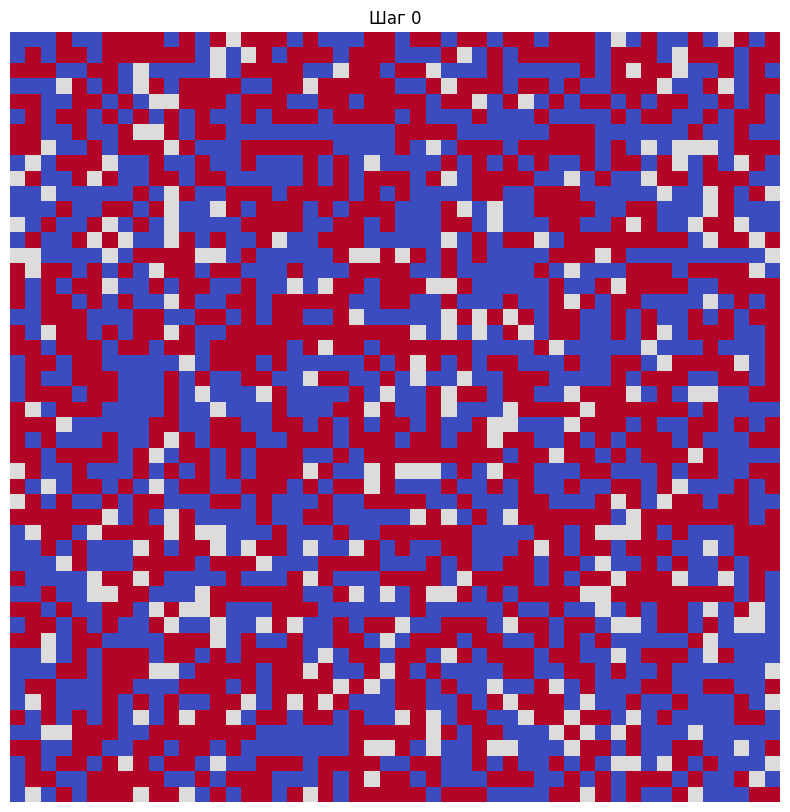

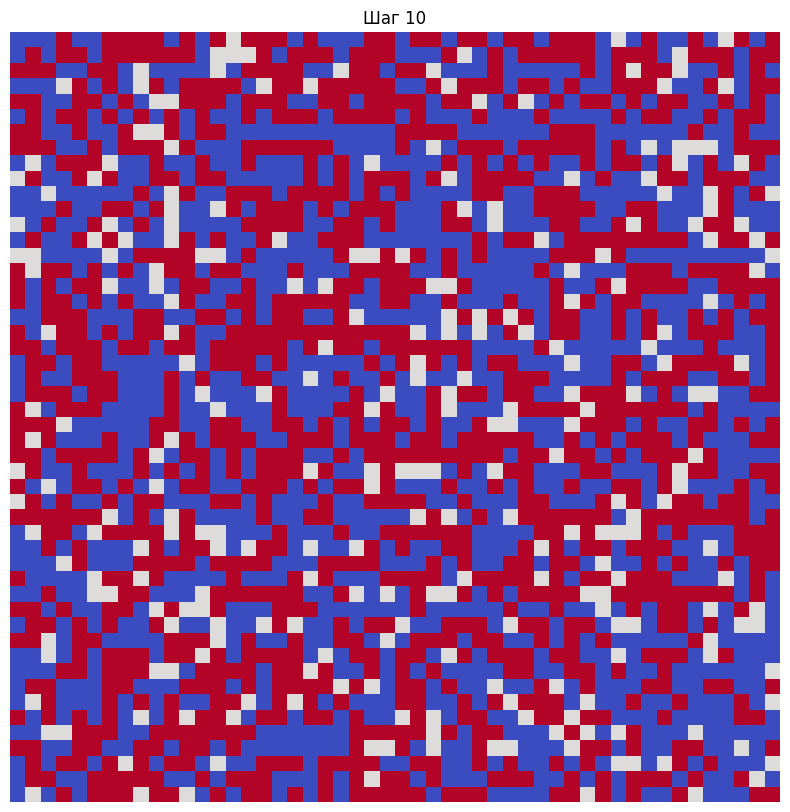

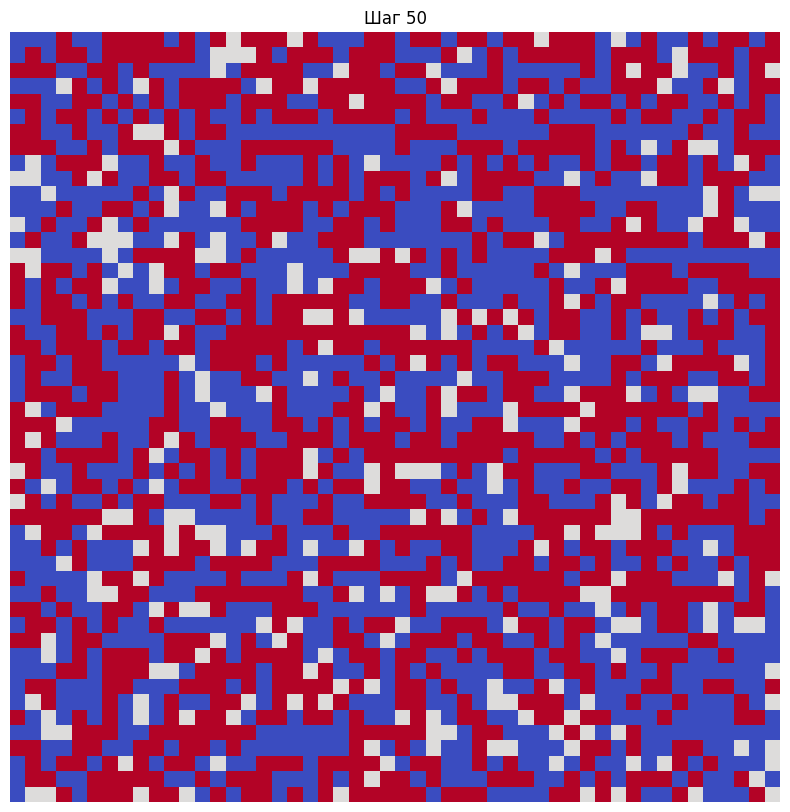

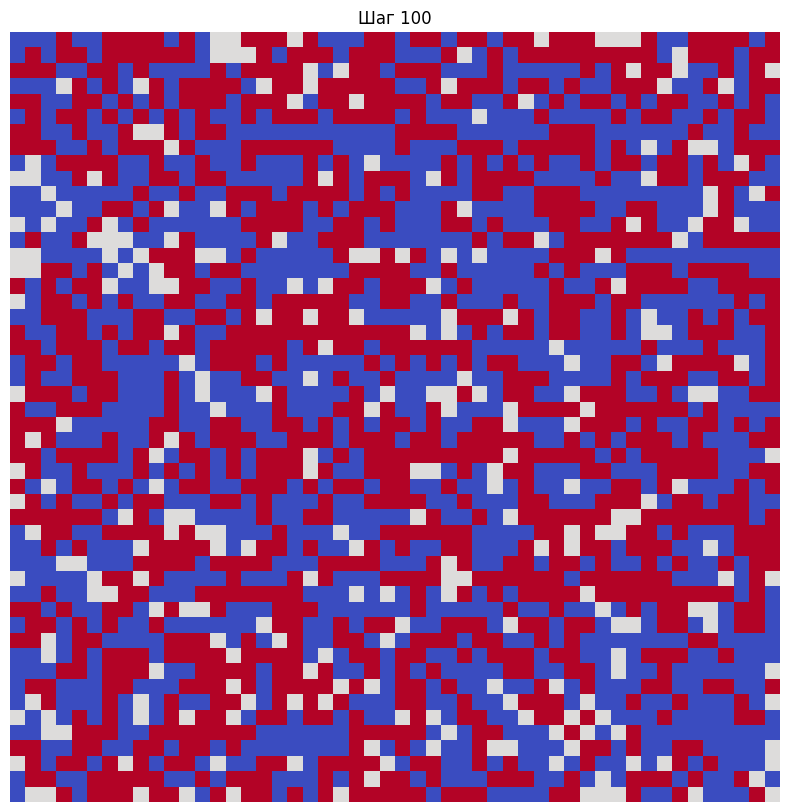

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(n):
    # Инициализация сетки n x n.
    # Каждая ячейка может быть 'R' (красная), 'B' (синяя) или None (пустая).
    # Вероятности распределения: 45% красных, 45% синих, 10% пустых.
    grid = np.random.choice(['R', 'B', None], size=(n, n), p=[0.45, 0.45, 0.1])
    return grid

def is_happy(x, y, grid):
    # Проверка, является ли ячейка в позиции (x, y) "счастливой".
    color = grid[x, y]
    if color is None:
        return True  # Пустая ячейка всегда считается "счастливой".

    # Подсчет количества соседей того же цвета.
    count = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                if grid[nx, ny] == color:
                    count += 1

    # Ячейка считается "счастливой", если у нее как минимум 2 соседа того же цвета.
    return count >= 2

def find_unhappy_cells(grid):
    # Поиск и возврат списка "несчастливых" ячеек.
    unhappy_cells = []
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] is not None and not is_happy(i, j, grid):
                unhappy_cells.append((i, j))
    return unhappy_cells

def find_empty_cells(grid):
    # Поиск и возврат списка пустых ячеек.
    empty_cells = []
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] is None:
                empty_cells.append((i, j))
    return empty_cells

def move_unhappy(grid):
    # Перемещение "несчастливой" ячейки в случайно выбранную пустую ячейку.
    unhappy_cells = find_unhappy_cells(grid)
    empty_cells = find_empty_cells(grid)

    if not unhappy_cells or not empty_cells:
        return grid  # Нет движения, если нет "несчастливых" ячеек или пустых мест.

    # Случайный выбор "несчастливой" ячейки и пустой ячейки.
    unhappy = np.random.choice(len(unhappy_cells))
    empty = np.random.choice(len(empty_cells))

    # Обмен местами между "несчастливой" ячейкой и пустой ячейкой.
    ux, uy = unhappy_cells[unhappy]
    ex, ey = empty_cells[empty]
    grid[ex, ey], grid[ux, uy] = grid[ux, uy], grid[ex, ey]

    return grid

def plot_grid(grid, title=""):
    # Отображение сетки с красными, синими и пустыми ячейками.
    plt.figure(figsize=(10, 10))
    plt.imshow(np.where(grid == 'R', 1, np.where(grid == 'B', 0, 0.5)), cmap='coolwarm', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Инициализация сетки
n = 50  # размер сетки
grid = initialize_grid(n)

# Количество шагов моделирования
steps = [0, 10, 50, 100]

for step in steps:
    if step > 0:
        # Перемещение "несчастливых" ячеек на каждом шаге
        for _ in range(step - steps[steps.index(step) - 1]):
            grid = move_unhappy(grid)
    plot_grid(grid, title=f"Шаг {step}")


**Заключение**:

После 100 перемещений "несчастливых" клеток. На этом этапе сегрегация очень выражена. Большие области, полностью состоящие из клеток одного цвета, указывают на форму "стабильности" сетки после множества перемещений. Это предполагает, что клетки нашли свои "счастливые" места, где у них много соседей того же цвета, тем самым минимизируя будущие перемещения и укрепляя разделение.